In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Amazon Sale Report (1).csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
# Convert Date column safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert numeric columns
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Remove cancelled orders
df_clean = df[df['Status'] != 'Cancelled']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15444\3552435435.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


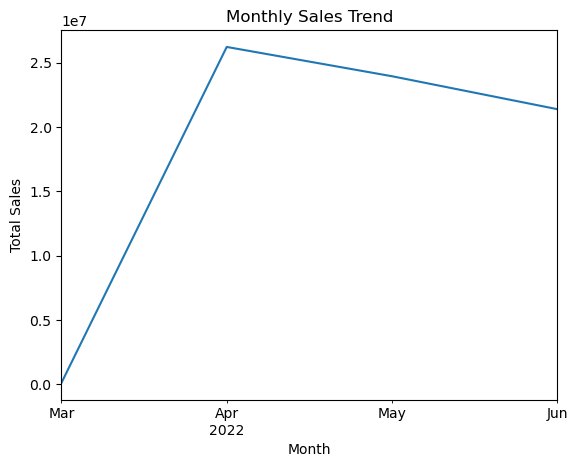

In [7]:
##Sales Overview Analysis
monthly_sales = df_clean.groupby(df_clean['Date'].dt.to_period('M'))['Amount'].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

Product Analysis

Text(0.5, 1.0, 'Sales by Product Category')

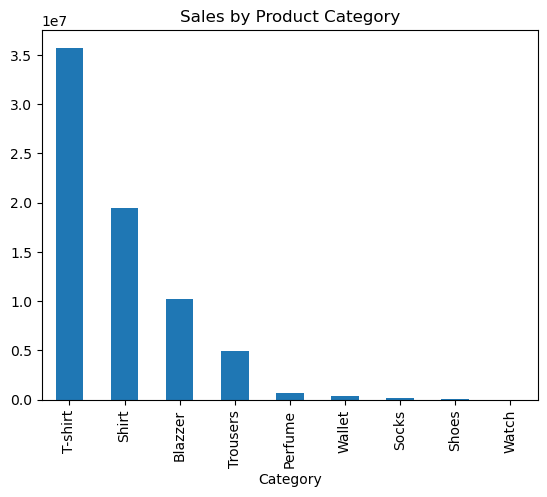

In [ ]:
#Top Product Categories
category_sales = df_clean.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')
plt.title("Sales by Product Category")

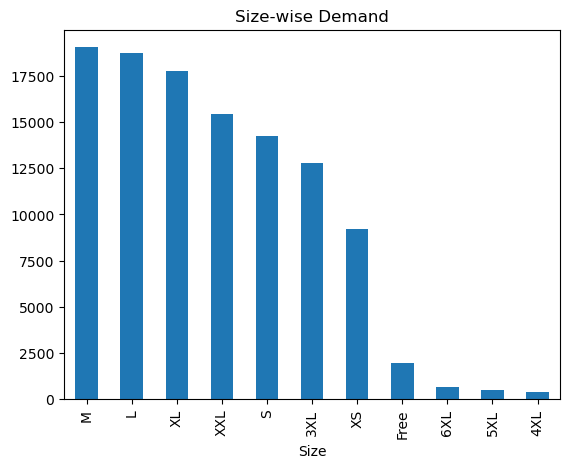

In [10]:
##Size Demand
size_demand = df_clean['Size'].value_counts()
size_demand.plot(kind='bar')
plt.title("Size-wise Demand")
plt.show()

Fulfillment Performance

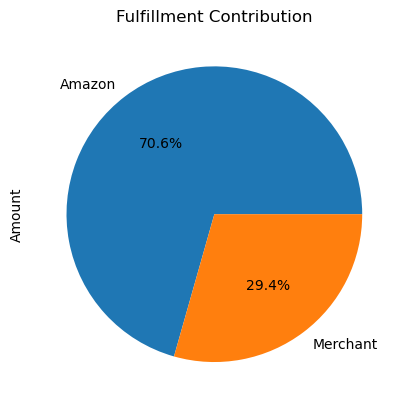

In [ ]:

fulfillment_sales = df_clean.groupby('Fulfilment')['Amount'].sum()
fulfillment_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Fulfillment Contribution")
plt.show()

CUSTOMER SEGMENTATION

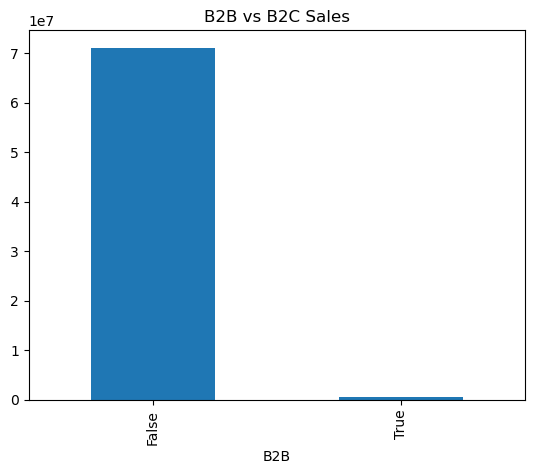

In [13]:
#B2B vs B2C
b2b_sales = df_clean.groupby('B2B')['Amount'].sum()
b2b_sales.plot(kind='bar')
plt.title("B2B vs B2C Sales")
plt.show()

GEOGRAPHICAL ANALYSIS

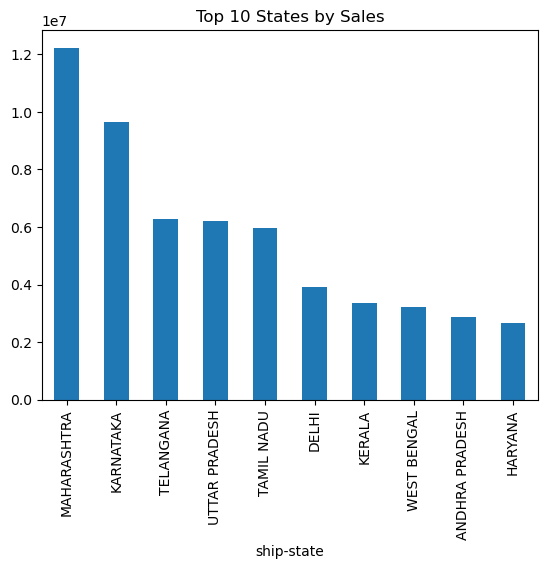

In [14]:
##State-wise Sales
state_sales = df_clean.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

state_sales.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.show()